## Problem.1

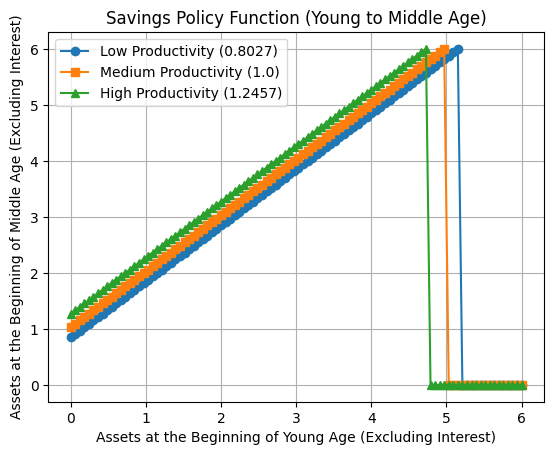

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20 - 1.0
y = np.array([0.8027, 1.0, 1.2457]) # Productivity levels
NL = 3 # Number of productivity levels

# Grids
a_l = 0.0
a_u = 6.0 # Upper bound for assets
NA = 100
a = np.linspace(a_l, a_u, NA)

# Utility function
def util(c, gamma):
    if c > 0:
        return (c**(1 - gamma)) / (1 - gamma)
    else:
        return -np.inf # Return negative infinity for non-positive consumption

# Transition matrix
P = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
])

# Initialization
v = np.zeros((3, NA, NL)) # Value function for 3 periods
aplus = np.zeros((2, NA, NL)) # Savings policy function for young and middle age

# Backward induction
# Period 3 (Old age)
for ia in range(NA):
    for il in range(NL):
        # In old age, there's no labor income, and all assets are consumed
        v[2, ia, il] = util((1.0 + r) * a[ia], gamma)

# Period 2 (Middle age)
for il in range(NL): # Productivity in middle age
    for ia in range(NA): # Assets at the beginning of middle age
        reward = np.zeros(NA)
        for iap in range(NA): # Assets for the next period (old age)
            # Middle-aged labor income depends on the productivity shock
            # For simplicity, we assume middle-age income is the same as the productivity level 'y'
            # (as per the problem's focus on initial productivity)
            consumption = y[il] + (1.0 + r) * a[ia] - a[iap]
            if consumption > 0:
                reward[iap] = util(consumption, gamma) + beta * v[2, iap, 0] # v[2] is independent of 'l'
        aplus[1, ia, il] = a[np.argmax(reward)]
        v[1, ia, il] = np.max(reward)

# Period 1 (Young age)
for il in range(NL): # Productivity in young age
    for ia in range(NA): # Initial assets
        reward = np.zeros(NA)
        for iap in range(NA): # Assets for the next period (middle age)
            consumption = y[il] + a[ia] - a[iap] # No interest on initial assets
            if consumption > 0:
                # Expected value of the value function in the next period
                # Since we're comparing productivity types from birth,
                # we assume the type is fixed for this problem.
                ev_next_period = v[1, iap, il]
                reward[iap] = util(consumption, gamma) + beta * ev_next_period
        aplus[0, ia, il] = a[np.argmax(reward)]
        v[0, ia, il] = np.max(reward)

# Plotting the policy function for savings from young to middle age
plt.figure()
plt.plot(a, aplus[0, :, 0], marker='o', label='Low Productivity (0.8027)')
plt.plot(a, aplus[0, :, 1], marker='s', label='Medium Productivity (1.0)')
plt.plot(a, aplus[0, :, 2], marker='^', label='High Productivity (1.2457)')
plt.title("Savings Policy Function (Young to Middle Age)")
plt.xlabel("Assets at the Beginning of Young Age (Excluding Interest)")
plt.ylabel("Assets at the Beginning of Middle Age (Excluding Interest)")
plt.legend()
plt.grid(True)
plt.show()